## Анализ графа друзей Вконтакте. Визуализация в NetworkX.

### Содержание работы
1. [Построение графа друзей](#graph)
2. [Betweenness centrality](#betweenness_centrality)
3. [Degree centrality](#degree_centrality)
4. [Closeness centrality](#closeness_centrality)
5. [Community detection](#community_detection)
6. [Clique detection](#clique_detection)

<a id='graph'></a>

### Построение графа друзей

In [1]:
id_app = 7523978
login = 'dina.kayumova@gmail.com'
pwd = xxxx

In [12]:
import json
import requests

from collections import Counter
import numpy as np

import networkx as nx
from networkx.algorithms import community
from networkx import edge_betweenness_centrality as betweenness


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 12]

In [3]:
import vk
session = vk.AuthSession(id_app, login, pwd, scope='friends')
vk_api = vk.API(session)

In [4]:
vk_api.users.get(user_id=11684665, v='5.110')

[{'id': 11684665,
  'first_name': 'Дина',
  'last_name': 'Каюмова',
  'is_closed': False,
  'can_access_closed': True}]

In [5]:
friends_ids = vk_api.friends.get(user_id=11684665, v='5.110', fields='nickname')

In [6]:
print(friends_ids)

{'count': 66, 'items': [{'id': 137827, 'first_name': 'Карина', 'last_name': 'Буянова', 'is_closed': True, 'can_access_closed': True, 'nickname': '', 'online': 0, 'track_code': '9ec00374mqdapcW5KG4kbRmgCmO16WtAnPQjoCAAH2Wv1T6r9r33zAOc87gsa3pmLkSatUODHFTunQ'}, {'id': 247654, 'first_name': 'Мария', 'last_name': 'Бойко', 'is_closed': False, 'can_access_closed': True, 'nickname': '', 'online': 0, 'track_code': '0d35c78094FRgskR-dSZ_W8AGOqZ-T6fYPSjaapza3_K54_Z--Ga6l7mqUKvhpr4WuSIPG-TSYsSnQ'}, {'id': 532032, 'first_name': 'Артур', 'last_name': 'Аликулов', 'is_closed': True, 'can_access_closed': True, 'nickname': '', 'online': 0, 'track_code': '26730385hgH5W8myKDlNVvfIL0npaj_ZhiepTpYvLsevqoukvDHravA-97EvbU1Rxyy_nx8ASM30Tg'}, {'id': 747370, 'first_name': 'Андрей', 'last_name': 'Сергеев', 'deactivated': 'banned', 'online': 0, 'track_code': 'c3b3c742WKAk1ppUs526Bq86CxcPtH-MUQyEvdUFD3TKUTEuFd81y33kqVKxzL4InN6bwfneCJgjZQ'}, {'id': 795546, 'first_name': 'Евгения', 'last_name': 'Сергеева', 'is_closed

In [7]:
labels={}

In [8]:
friends_second_circle = {}
second_circle = 0

In [9]:
for friend_id in friends_ids['items']:    
    try:
        friends_second_circle[friend_id['id']] = vk_api.friends.get(user_id=friend_id['id'], v='5.110', fields='nickname')                        
        labels[friend_id['id']] = friend_id['first_name'] + ' ' +  friend_id['last_name']        
        second_circle += len(friends_second_circle[friend_id['id']])
        time.sleep(1)
    except Exception as e:
        print(e)
        continue    

18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '747370', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '1046488', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '2354006', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '2389008', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '10366270', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '13691754', 'v': '5.110', 'fields': 'nickname'}
18. User was deleted or banned. request_params = {'method': 'friends.get', 'oauth': '1', 'user_id': '105305301', 'v':

In [10]:
second_circle + 66

184

In [13]:
G = nx.DiGraph()

In [14]:
G.add_nodes_from(labels.keys())

In [15]:
G.nodes

NodeView((137827, 247654, 532032, 795546, 841630, 908801, 1085389, 1172142, 1816610, 1850704, 2018085, 2161467, 2164132, 2521798, 2522299, 3566028, 4057598, 4306718, 4447874, 4724163, 4769614, 5357018, 5527454, 6191300, 6324091, 6366838, 7042799, 9021590, 12040185, 12318801, 12660555, 16392769, 17153224, 19639931, 22054693, 24418238, 30146250, 38157848, 43823098, 44091812, 44682443, 49239605, 59812396, 61232385, 64369846, 64757888, 68307441, 81082464, 85609801, 93631564, 112257874, 170659278, 182006891, 202101021, 259356122, 322452743, 339619173, 372695621, 517521954))

Количество друзей

In [16]:
G.number_of_nodes()

59

In [39]:
len(friends_second_circle)

59

In [17]:
for k,v in friends_second_circle.items():      
    for item in v['items']:
        labels[item['id']] = item['first_name'] + ' ' + item['last_name']
        G.add_node(item['id'])
        G.add_edge(k, item['id'])        

In [18]:
G.number_of_nodes()

12454

In [19]:
G.number_of_edges()

12922

In [20]:
G.is_directed()

True

In [21]:
len(labels)

12454

In [22]:
pos = nx.spring_layout(G)

{137827: Text(0.02166171371936798, -0.04831478372216225, 'Карина Буянова'),
 247654: Text(-0.06479903310537338, 0.0552607960999012, 'Мария Бойко'),
 532032: Text(-0.02549104019999504, -0.038445670157670975, 'Артур Аликулов'),
 795546: Text(0.1035597026348114, 0.00015710934530943632, 'Евгения Сергеева'),
 841630: Text(-0.008340578526258469, 0.0640864297747612, 'Галина Ким'),
 908801: Text(0.041930194944143295, -0.0503554530441761, 'Дмитрий Исеев'),
 1085389: Text(-0.029195452108979225, 0.027129877358675003, 'Евгений Наумов'),
 1172142: Text(0.017645126208662987, 0.08153233677148819, 'Владислав Иофе'),
 1816610: Text(0.05151123180985451, -0.004849105607718229, 'Марина Симонова'),
 1850704: Text(0.022117555141448975, 0.032356783747673035, 'Марина Рахимова'),
 2018085: Text(0.061353716999292374, -0.011858533136546612, 'Shukhrat Narkul'),
 2161467: Text(-0.028163274750113487, 0.029649067670106888, 'Kate Aleksanchenko'),
 2164132: Text(0.03627650439739227, -0.08749178797006607, 'Михаил Винни

C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33778 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dinak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30000 missing from c

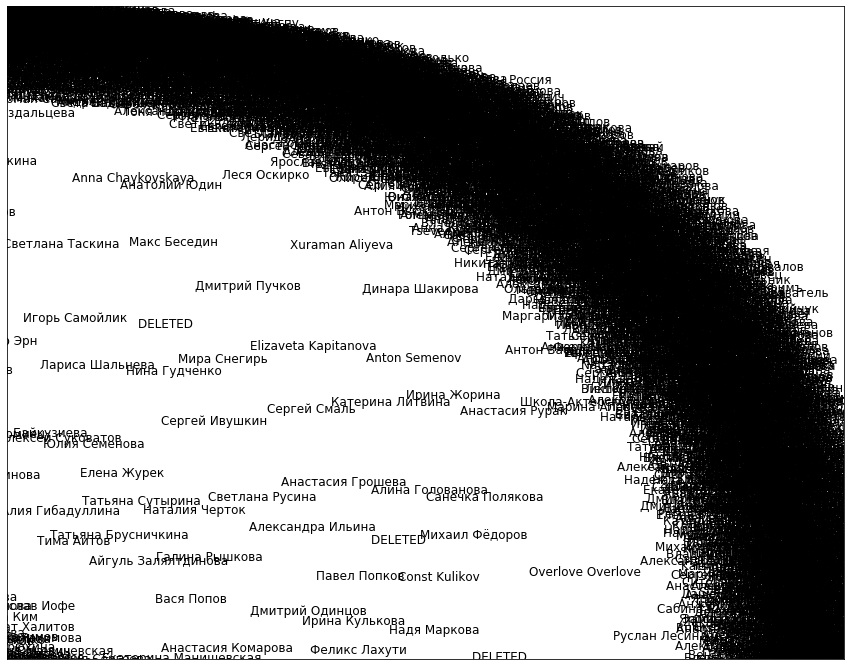

In [23]:
nx.draw_networkx_labels(G, pos, labels) 

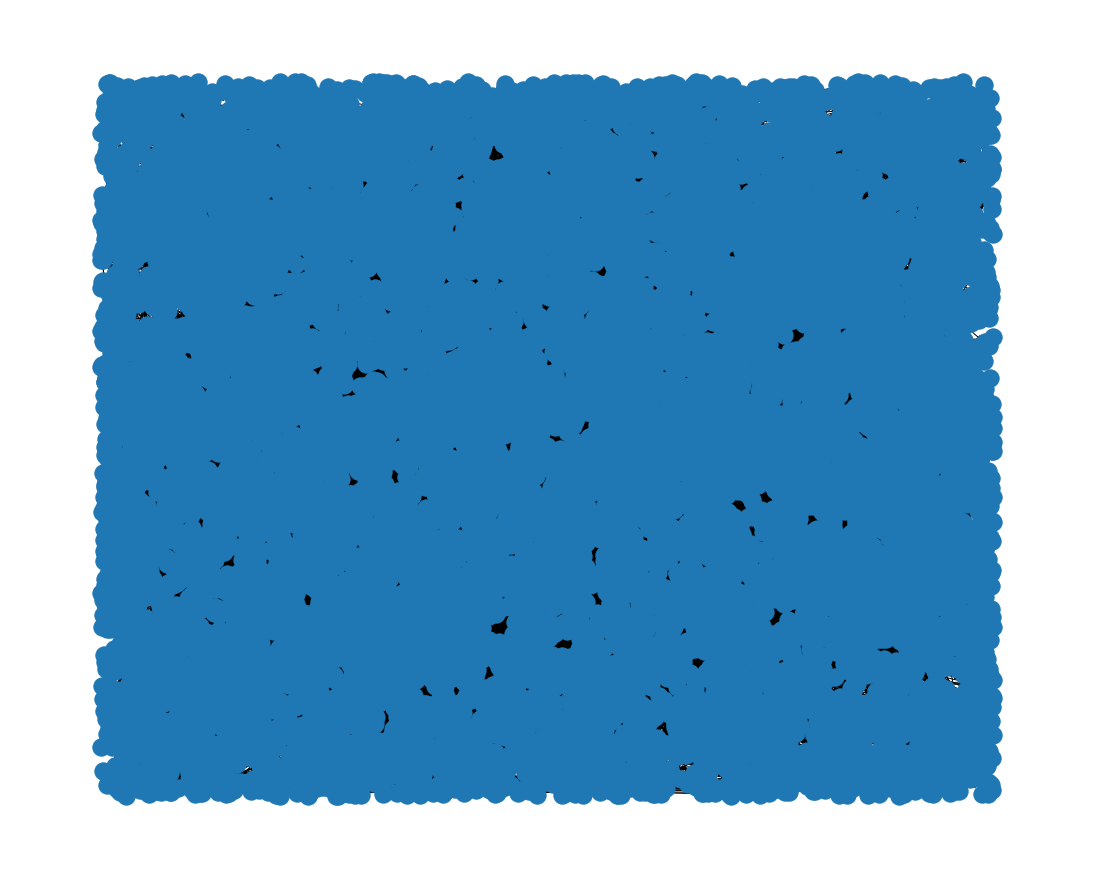

In [32]:
nx.draw_random(G)

<a id='betweenness_centrality'></a>

### Betweenness centrality

In [26]:
betweenness_centrality = nx.betweenness_centrality(G)

In [36]:
betweenness_centrality

{137827: 0.0,
 247654: 0.00021391708119670983,
 532032: 3.030389875741117e-05,
 795546: 7.016423512767788e-06,
 841630: 0.00014366901012632425,
 908801: 0.0,
 1085389: 5.887862745548704e-06,
 1172142: 0.00035657576073142846,
 1816610: 0.0,
 1850704: 2.0443502111251297e-05,
 2018085: 4.684921378757338e-05,
 2161467: 0.00044025596205325555,
 2164132: 1.0086108799603695e-05,
 2521798: 3.094406141736897e-06,
 2522299: 1.921777763607354e-06,
 3566028: 4.2259764043352305e-06,
 4057598: 0.0003233455576456071,
 4306718: 0.0004046948280233631,
 4447874: 0.0,
 4724163: 6.472649155071459e-06,
 4769614: 0.0,
 5357018: 0.0,
 5527454: 0.0,
 6191300: 5.082208548868632e-07,
 6324091: 0.0,
 6366838: 0.00044498592145163755,
 7042799: 0.0,
 9021590: 0.0,
 12040185: 0.0,
 12318801: 2.449053637706719e-07,
 12660555: 5.9639599858526196e-05,
 16392769: 4.46123909923769e-05,
 17153224: 2.353855314485517e-06,
 19639931: 0.00014388827336109825,
 22054693: 6.542427990535773e-06,
 24418238: 3.047758963358508e-05,

In [27]:
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(labels[k], v)

Олеся Гончар 0.00044498592145163755
Игорь Иофе 0.00044040074027739307
Kate Aleksanchenko 0.00044025596205325555
Шухрат Рахимов 0.0004046948280233631
Владислав Иофе 0.00035657576073142846
Андрей Голуб 0.0003233455576456071
Валерий Иофе 0.00026287404727867367
Елена Авакян 0.0002560317445699911
Мария Бойко 0.00021391708119670983
Талия Лили 0.00014388827336109825


In [28]:
node_size=np.array(list(betweenness_centrality.values())) * 100000

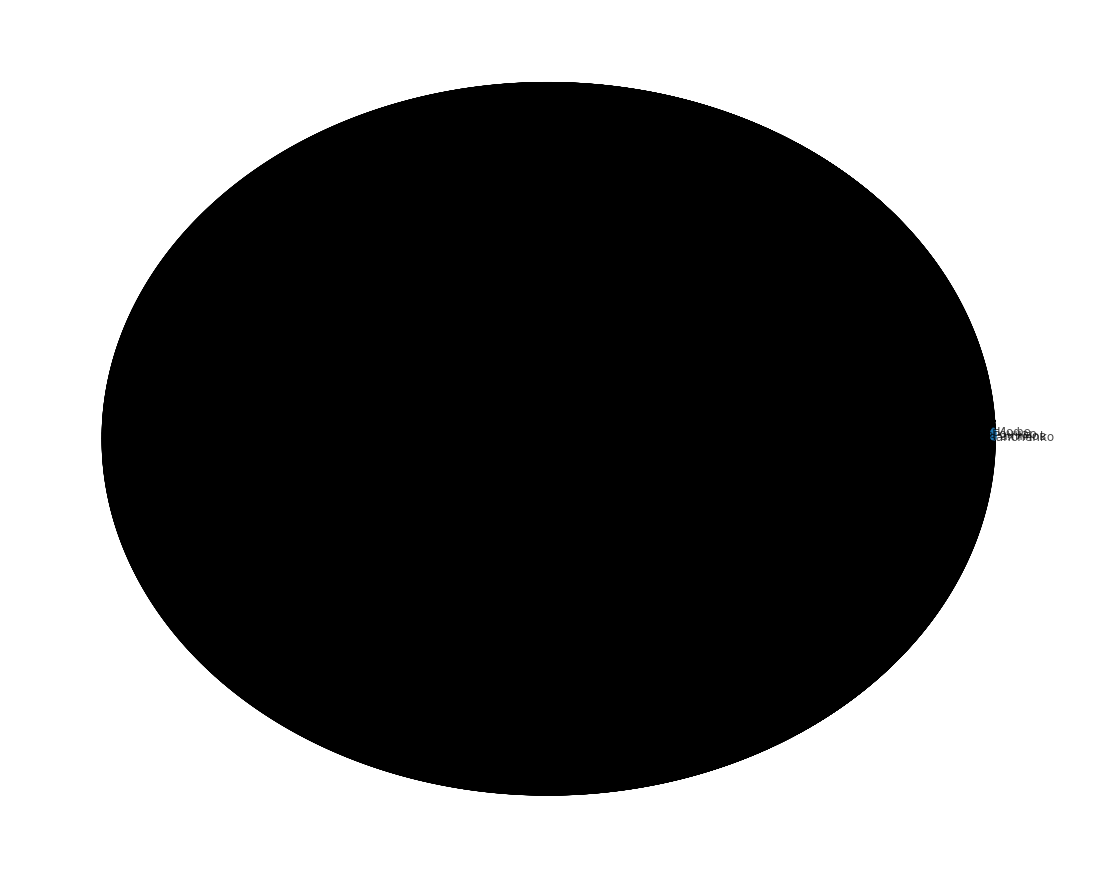

In [35]:
th = 0.0004# betweenness_centrality_counts.most_common(20)[-1][1]
nx.draw_shell(
    G,     
    with_labels=True, 
    alpha=0.7, 
    labels={n: labels[n] for n in G.nodes() if betweenness_centrality[n] > th}, 
    node_size=node_size,
    linewidths=0.1,
)

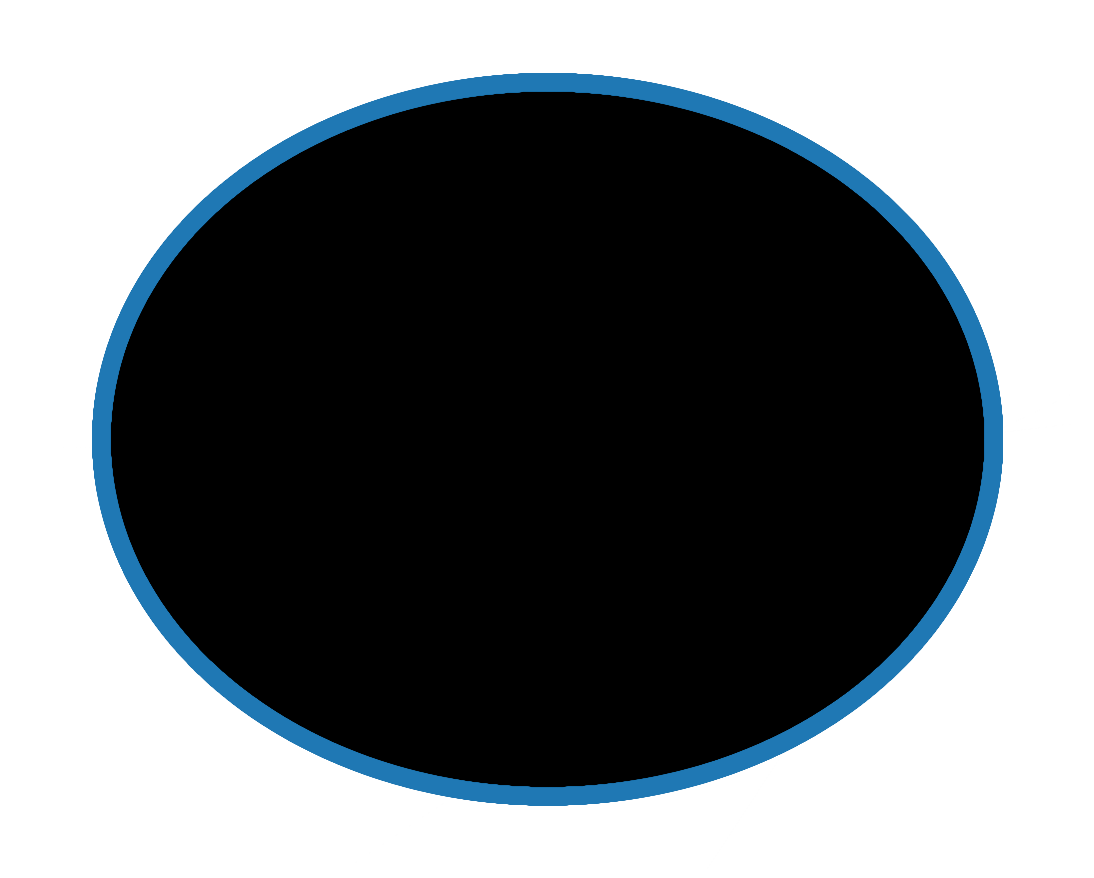

In [37]:
nx.draw_shell(G)

<a id='degree_centrality'></a>

### Degree centrality

In [30]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(labels[k], v)

Андрей Голуб 0.10310768489520597
Рифат Гумеров 0.07187023207259295
Валентина Катышева 0.06504456757407853
Pavel Lebedev 0.06303701919216254
Талия Лили 0.05315988115313579
Ella Shtolz 0.052356861800369386
Юлия Завьялова 0.04360395085521561
Игорь Иофе 0.034690436039508554
Елена Рябчикова 0.029551112181803584
Юлия Гоняева 0.027222356058781018


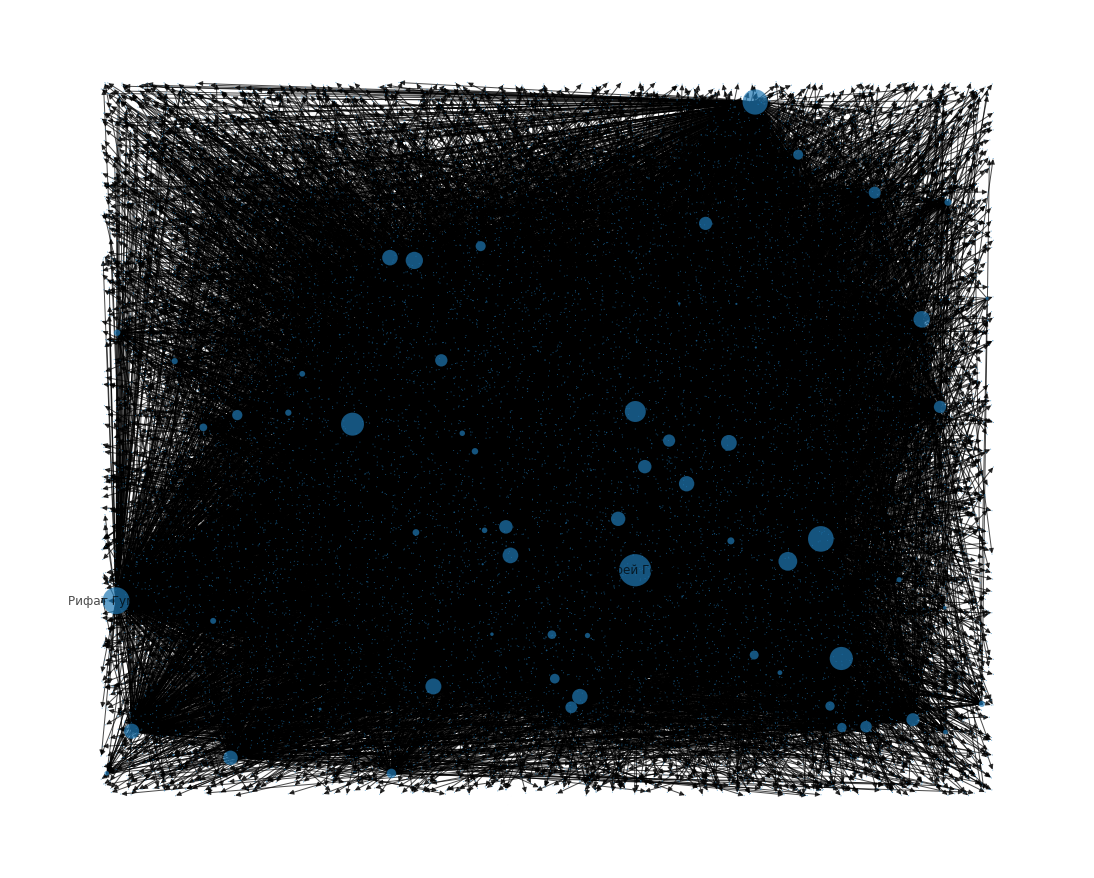

In [38]:
dc = 0.07#degree_centrality_counts.most_common(20)[-1][1]
nx.draw_random(
    G,     
    with_labels=True, 
    alpha=0.7, 
    labels={n: labels[n] for n in G.nodes() if degree_centrality[n] > dc}, 
    node_size=np.array(list(degree_centrality.values())) * 10000,
    linewidths=0.1,
)

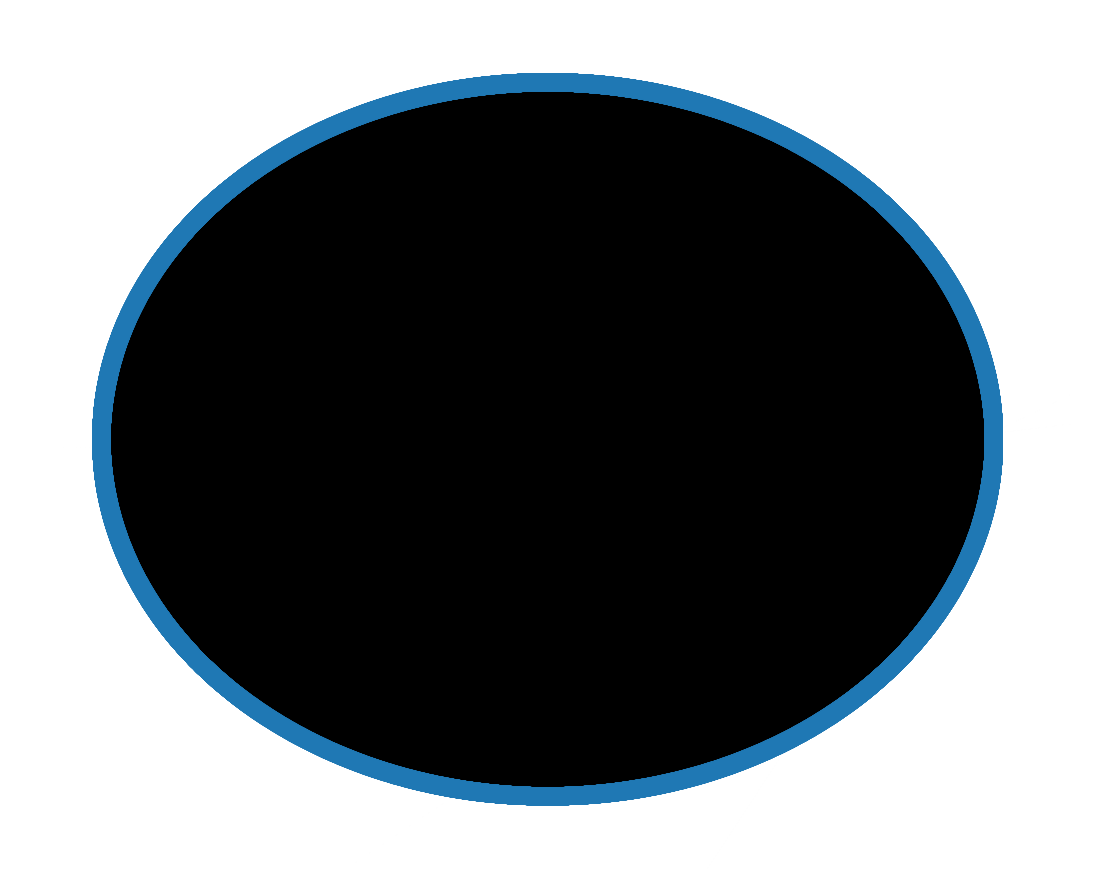

In [40]:
nx.draw_shell(
    G,     
    #with_labels=True, 
    #alpha=0.7, 
    #labels={n: labels[n] for n in G.nodes() if degree_centrality[n] > dc}, 
    #node_size=np.array(list(degree_centrality.values())) * 10000,
    #linewidths=0.1,
)

<a id='closeness_centrality'></a>

### Closeness centrality 

In [41]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print(labels[k], v)

Дина Каюмова 0.00473781418132177
Шухрат Рахимов 0.0011312098708535399
Евгения Приходько 0.0011178394399305024
Олеся Гончар 0.0010200993096680883
Александра Нестерова 0.0009936350577160022
Vadim Osovitny 0.000936855911560802
Svetlana Kim 0.0009351289882215193
Игорь Иофе 0.0008757456337716606
Shukhrat Narkul 0.0008672609009877138
Валерий Иофе 0.0008595281220351484


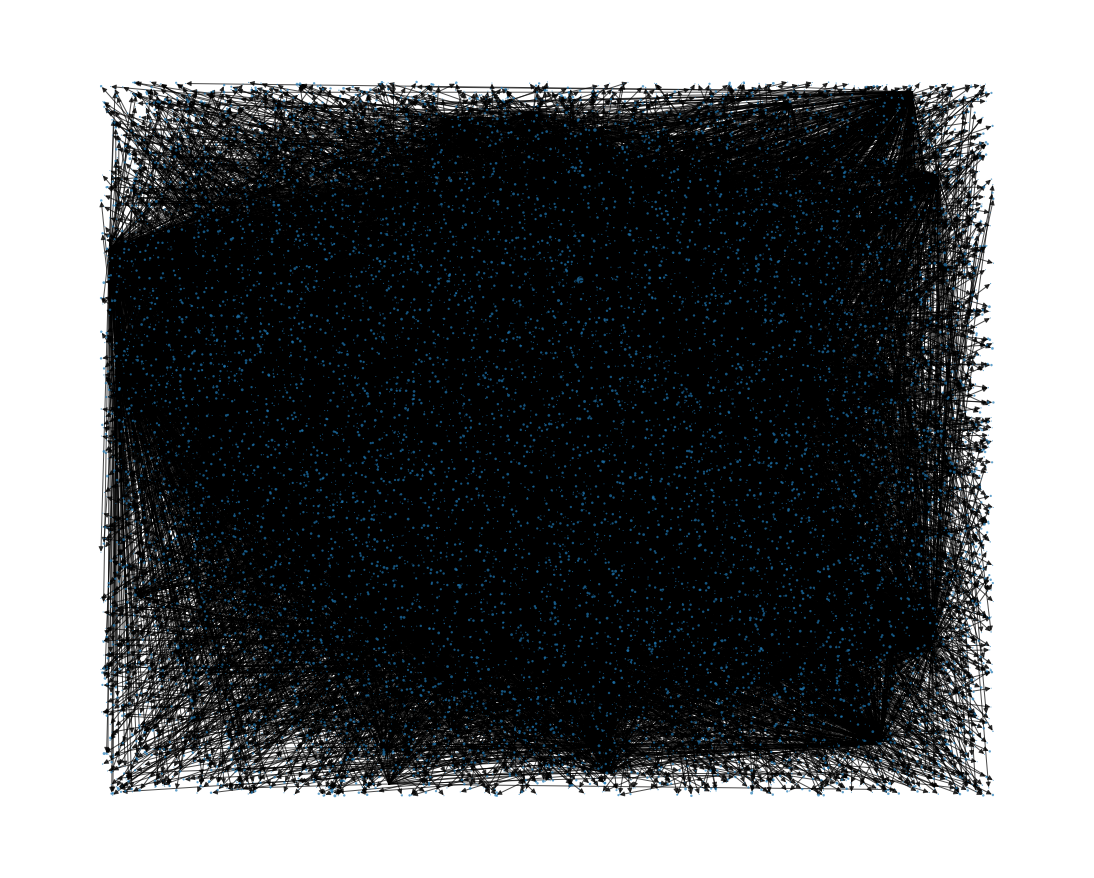

In [42]:
cc = 0.004#closeness_centrality_counts.most_common(20)[-1][1]
nx.draw_random(
    G, 
    with_labels=True, 
    alpha=0.7, 
    labels={n: labels[n] for n in G.nodes() if closeness_centrality[n] > cc}, 
    node_size=np.array(list(closeness_centrality.values())) * 10000,
    linewidths=0.1,
)

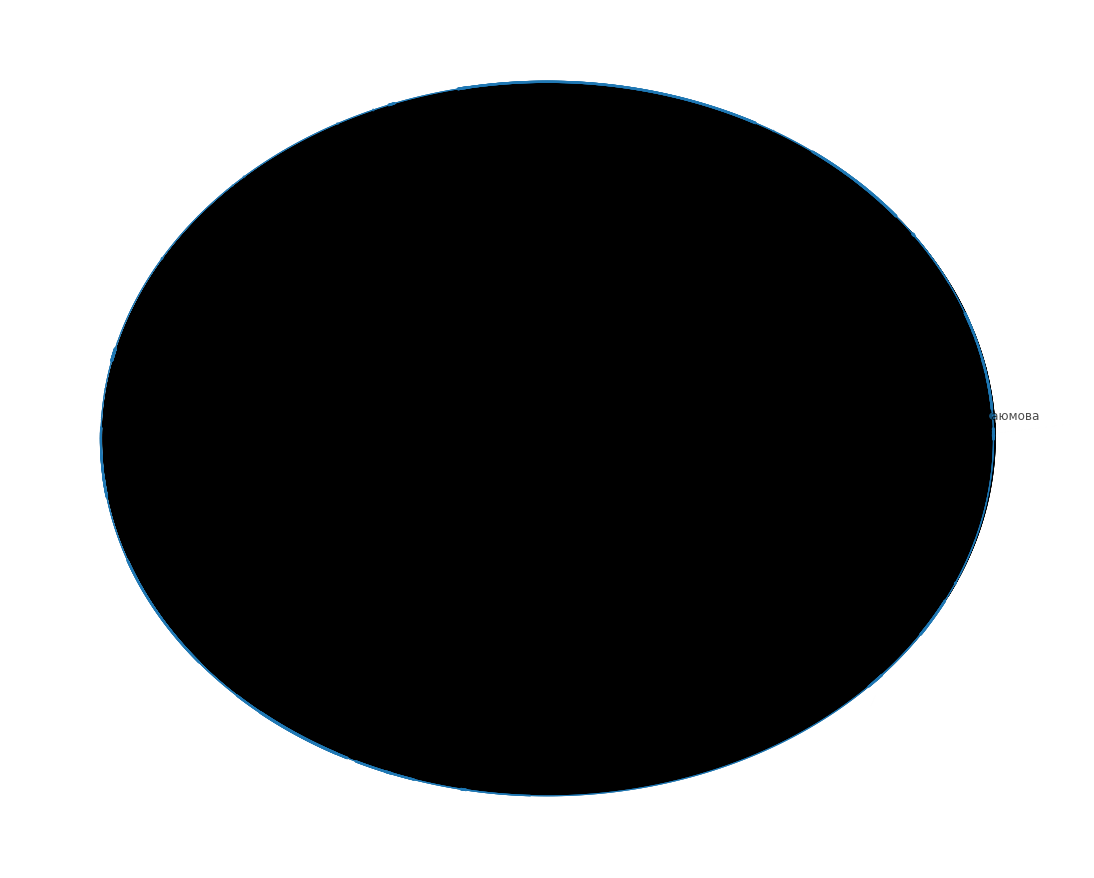

In [43]:
nx.draw_shell(
    G,     
    with_labels=True, 
    alpha=0.7, 
    labels={n: labels[n] for n in G.nodes() if closeness_centrality[n] > cc}, 
    node_size=np.array(list(closeness_centrality.values())) * 10000,
    linewidths=0.1,
)

<a id='community_detection'></a>

### Community detection

In [47]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
for c in communities:
    print('Community: ', ', '.join([labels[n] for n in c]))

Community:  Дмитрий Василик, Павел Покотилов, Саша Константинов, Катя Высоцкая, Антон Антонов, Денис Степанов, Полина Деева, Анна Санина, Валентин Малых, Дмитрий Кривоконь, Николай Двас, Лёша Дмитриев, Соня Ваганова, Алексей Смоляков, Паата Иванишвили, Нина Пахомова, Роман Небовский, Даня Пономаренко, Антон Лобов, Сергей Нурк, Дмитрий Dm, Борис Щепанюк, Кир Тихомиров, Анна Рассыпнова, Сергей Безрукавников, Оля Демидова, Сергей Арутюнов, Kirill Pavlov, Дмитрий Карташов, Виталий Ищенко, Дмитрий Прокопчук, Артём Попов, Мари Нестерова, Arseniy Titorenko, Ким Галачян, Семён Ляшенко, Вера Тимофеева, Алексей Игнатьев, Алексей Натекин, Евгения Лейсблус, Юлия Чернова, Юрий Болотов, Мария Киселева, Александр Беляков, Дмитрий Сироткин, Вадим Подгурский, Марьяна Тэн, Цагана Санджиева, Сергей Дмитриев, Татьяна Свидлова, Ульяна Чеклина, Дмитрий Потаралов, Геннадий Хорвенко, Марат Маратов, Андрей Абрамов, Михаил Мишеньков, Валерия Герингер, Анна Анина, Алексей Елшанский, Илья Яковлев, Сергей Мартынюк

In [48]:
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)


comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)
communities = tuple(sorted(c) for c in next(comp))
for c in communities:
    print('Community: ', ', '.join([labels[n] for n in c]))

Community:  Дмитрий Василик, Павел Покотилов, Саша Константинов, Катя Высоцкая, Антон Антонов, Денис Степанов, Полина Деева, Анна Санина, Валентин Малых, Дмитрий Кривоконь, Николай Двас, Лёша Дмитриев, Соня Ваганова, Алексей Смоляков, Татьяна Замахова, Паата Иванишвили, Нина Пахомова, Роман Небовский, Даня Пономаренко, Антон Лобов, Сергей Нурк, Дмитрий Dm, Борис Щепанюк, Кир Тихомиров, Анна Рассыпнова, Сергей Безрукавников, Оля Демидова, Сергей Арутюнов, Kirill Pavlov, Дмитрий Карташов, Виталий Ищенко, Дмитрий Прокопчук, Артём Попов, Мари Нестерова, Arseniy Titorenko, Ким Галачян, Семён Ляшенко, Вера Тимофеева, Алексей Игнатьев, Алексей Натекин, Евгения Лейсблус, Юлия Чернова, Юрий Болотов, Мария Киселева, Александр Беляков, Дмитрий Сироткин, Вадим Подгурский, Марьяна Тэн, Цагана Санджиева, Сергей Дмитриев, Татьяна Свидлова, Ульяна Чеклина, Виктория Абрамова, Дмитрий Потаралов, Геннадий Хорвенко, Марат Маратов, Андрей Абрамов, Михаил Мишеньков, Валерия Герингер, Анна Анина, Алексей Елш

<a id='clique_detection'></a>

### Clique detection

In [49]:
# https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html

for c in nx.find_cliques(G.to_undirected()):
    print(c, ', '.join([labels[n] for n in c]))

[5537795, 12040185] Алексей Дронов, Евгения Киржой
[214237187, 12040185] Группа Чтд, Евгения Киржой
[393223, 908801] Юлия Назина, Дмитрий Исеев
[1572872, 30146250] Luiza Doll, Игорь Иофе
[84934665, 339619173] Вячеслав Ерохин, Ella Shtolz
[51281930, 64369846] Мария Климкина, Александра Андрюхина
[57475087, 5527454] Ольга Петриоглу, Тимофей Цыганов
[252149785, 64369846] Камила Садикова, Александра Андрюхина
[9699354, 12040185] Екатерина Загарина, Евгения Киржой
[4587555, 6324091] Андрей Шеставин, Юлия Завьялова
[237076522, 6324091] Максим Сергеев, Юлия Завьялова
[33947692, 4769614] DELETED , Валентина Катышева
[6553648, 1085389] Роман Микрюков, Евгений Наумов
[175538226, 4769614] Группа Алидея, Валентина Катышева
[320536630, 19639931] Василиса Лобан, Талия Лили
[57212983, 5527454] Сергей Бирюков, Тимофей Цыганов
[416612409, 68307441] Катерина Игнатьева, Pavel Lebedev
[358744124, 1085389] Маргарита Филатова, Евгений Наумов
[32702530, 64757888] Алевтина Дорофеева, Рифат Гумеров
[6324294, 6

[36472694, 2161467] Константин Малашонок, Kate Aleksanchenko
[168167286, 4769614] Виталий Кузьмин, Валентина Катышева
[441812854, 64757888] Василий Тёмный, Рифат Гумеров
[379258748, 81082464] Эмиль Марданов, Руслан Ташский
[394364798, 339619173] Людмила Ушакова, Ella Shtolz
[3475330, 12040185] Annette Khroustaleva, Евгения Киржой
[52529028, 4769614] Марвин Мартиросян, Валентина Катышева
[350062480, 339619173] Вита Витте, Ella Shtolz
[34670482, 6366838] Евгения Пак, Олеся Гончар
[29493140, 908801] Константин Орехов, Дмитрий Исеев
[110659476, 17153224] Александр Милитов, Елена Рябчикова
[110659476, 6324091] Александр Милитов, Юлия Завьялова
[1935254, 841630] Белла Ни, Галина Ким
[12126103, 5357018] Alexander Shligerski, Юлия Гоняева
[56428448, 30146250] Мария Бадикова, Игорь Иофе
[29624224, 64757888] Сергей Плаксин, Рифат Гумеров
[31131554, 64757888] Екатерина Соболева, Рифат Гумеров
[82446244, 59812396, 372695621] Мария Шельменкова, Анастасия Соколова, Анна Пятова
[30377895, 44682443] О

[1085389, 2726006] Евгений Наумов, Леди Тьма
[1085389, 3353210] Евгений Наумов, Алекс Иден
[1085389, 222250107] Евгений Наумов, Анна Тимофеева
[1085389, 3552892] Евгений Наумов, Пётр Ратчин
[1085389, 11457660] Евгений Наумов, Наталья Золотарева
[1085389, 7878782] Евгений Наумов, Наташа Москва
[1085389, 5664897] Евгений Наумов, Saya Otonashi
[1085389, 328016515] Евгений Наумов, Александра Долинина
[1085389, 20763268] Евгений Наумов, Маша Иванова
[1085389, 261908613] Евгений Наумов, Данила Шалимов
[1085389, 1254531] Евгений Наумов, Евгений Савинов
[1085389, 133974663] Евгений Наумов, Мария Миронова
[1085389, 1539205] Евгений Наумов, DELETED 
[1085389, 179444868] Евгений Наумов, Natalia Baranova
[1085389, 353791115] Евгений Наумов, Ирина Майорова
[1085389, 148181133] Евгений Наумов, Юля Гвоздева
[1085389, 345074322] Евгений Наумов, Гриша Фридман
[1085389, 15522965] Евгений Наумов, Екатерина Гудкова
[1085389, 200363669] Евгений Наумов, Анна Шайдурова
[1085389, 1514135] Евгений Наумов, Анна

[14095875, 64757888] Алена Бабанская, Рифат Гумеров
[338793989, 64757888] Vi Jaya, Рифат Гумеров
[1742349, 372695621] Ксения Ефимова, Анна Пятова
[418027026, 202101021] Кирилл Ким, Амалия Талыбова
[161977875, 247654] Николай Кириллов, Мария Бойко
[33625621, 908801] Евгения Боярова, Дмитрий Исеев
[164107802, 68307441] Лера Малый, Pavel Lebedev
[333157919, 64369846] Марина Поташевская, Александра Андрюхина
[6428195, 64757888] Аксана Халвицкая, Рифат Гумеров
[59086374, 17153224] Дмитрий Расс, Елена Рябчикова
[25073199, 59812396] Людмила Никифорова, Анастасия Соколова
[308188722, 19639931] Макс Козик, Талия Лили
[223417908, 4769614] Lyra Page, Валентина Катышева
[4494907, 12040185] Артем Фуреев, Евгения Киржой
[78452284, 68307441] Наталья Сахьянова, Pavel Lebedev
[294131262, 19639931] Екатерина Поклонская, Талия Лили
[7444033, 4447874] Надежда Марченко, Анянь Варфоломеева
[17045070, 59812396] Лена Габова, Анастасия Соколова
[38180431, 9021590] Анатолий Алексеев, Наталья Самолетова
[4158831

[19963258, 64757888] Вера Величко, Рифат Гумеров
[252222843, 68307441] David Kartvelian, Pavel Lebedev
[206052729, 339619173] Irina Devyatova, Ella Shtolz
[217914755, 12040185] DELETED , Евгения Киржой
[78716291, 64757888] Лёня Ворон, Рифат Гумеров
[58105225, 12040185] Тамара Маляренко, Евгения Киржой
[2596237, 68307441] Сергей Буров, Pavel Lebedev
[5283214, 2018085] Сергей Цой, Shukhrat Narkul
[159128976, 19639931] Елена Бутырская, Талия Лили
[428547489, 64757888] Федор Остров, Рифат Гумеров
[36314533, 841630] Валентина Мартьянова, Галина Ким
[62561701, 12040185] Григорий Зевакин, Евгения Киржой
[157326759, 4769614] Ирина Новоженина, Валентина Катышева
[36478377, 4769614] Владимир Андреев, Валентина Катышева
[478551469, 339619173] Юлия Красногорск, Ella Shtolz
[2301362, 908801] Ирина Протасова, Дмитрий Исеев
[10165682, 2522299] Виктор Федорчук, Аня Орлова
[564659, 6366838] Мария Липатова, Олеся Гончар
[3448243, 24418238] Марина Кузнецова, Ренат Халитов
[245276087, 68307441] Владислав 

[64757888, 177489487] Рифат Гумеров, Павел Ланцов
[64757888, 232865361] Рифат Гумеров, Evgeniy Eugene
[64757888, 294436439] Рифат Гумеров, Таня Анчакова
[64757888, 363914839] Рифат Гумеров, Белатрисса Астра
[64757888, 390473305] Рифат Гумеров, Ирина Гарифова
[64757888, 3303006] Рифат Гумеров, Таня Барботина
[64757888, 74499678] Рифат Гумеров, Юлия Холод
[64757888, 225125982] Рифат Гумеров, Гуля Маматова
[64757888, 215070306] Рифат Гумеров, Культ Слов
[64757888, 255448674] Рифат Гумеров, Владимир Яковлев
[64757888, 94133867] Рифат Гумеров, Володимир Нагорняк
[64757888, 212106861] Рифат Гумеров, Арман Кишкембаев
[64757888, 5877363] Рифат Гумеров, Андрей Иванов
[64757888, 178550392] Рифат Гумеров, Любовь Отраднова
[64757888, 330987131] Рифат Гумеров, Нечто Зелёное
[64757888, 366634620] Рифат Гумеров, Андрей Белов
[64757888, 7087743] Рифат Гумеров, Татьяна Алферова
[64757888, 237461120] Рифат Гумеров, DELETED 
[64757888, 4107907] Рифат Гумеров, Алексей Кубрик
[64757888, 323204747] Рифат Гу

[9021590, 289729] Наталья Самолетова, Ольга Кожевникова
[9021590, 7861706] Наталья Самолетова, Тая Исаева
[9021590, 6171340] Наталья Самолетова, Елена Несмелова
[9021590, 141474511] Наталья Самолетова, Юлия Герасимова
[9021590, 4767187] Наталья Самолетова, Алена Вагапова
[9021590, 202962132] Наталья Самолетова, Елена Агафонова
[9021590, 7697368] Наталья Самолетова, Маргарита Сасова
[9021590, 132045274] Наталья Самолетова, Валентина Покатаева
[9021590, 40153314] Наталья Самолетова, Вячеслав Сидякин
[9021590, 34372324] Наталья Самолетова, Надежда Москвитина
[9021590, 95484389] Наталья Самолетова, Екатерина Горбунова
[9021590, 38657001] Наталья Самолетова, Алексей Григорьевский
[9021590, 15261931] Наталья Самолетова, Лена Давыдова-Бугаенко
[9021590, 33148396] Наталья Самолетова, Ольга Мастерская
[9021590, 17657839] Наталья Самолетова, Дина Евсеева
[9021590, 226943217] Наталья Самолетова, Ксения Барсегян
[9021590, 192239089] Наталья Самолетова, Татьяна Карпушкина-Денисова
[9021590, 3615435

[339619173, 7961953] Ella Shtolz, Виктор Алымов
[339619173, 307752291] Ella Shtolz, Big Whale
[339619173, 2123117] Ella Shtolz, Ваня Шедевр
[339619173, 316065141] Ella Shtolz, Иван Фиц
[339619173, 1398143] Ella Shtolz, Ирина Пастухова
[339619173, 403893642] Ella Shtolz, Юлия Николаева
[339619173, 264689035] Ella Shtolz, Елена Канурина
[339619173, 413627793] Ella Shtolz, Светлана Новикова
[339619173, 335787426] Ella Shtolz, Кристина Воробьева
[339619173, 185105829] Ella Shtolz, Алена Маслова
[339619173, 26719655] Ella Shtolz, Елена Яковенко
[339619173, 20825512] Ella Shtolz, Марта Блэкер
[339619173, 218004904] Ella Shtolz, Юлия Истринская
[339619173, 455753129] Ella Shtolz, Елена Простор
[339619173, 369028524] Ella Shtolz, Владислав Лесков
[339619173, 2618800] Ella Shtolz, Людмила Дубровская
[339619173, 12381621] Ella Shtolz, Кирилл Козырь
[339619173, 23811512] Ella Shtolz, Анфиса Лебедева
[339619173, 365198778] Ella Shtolz, Евгения Беляева
[339619173, 17595836] Ella Shtolz, Ольга Егоро

[43823098, 41516369] Светлана Халикова, Ксения Злобарь
[43823098, 175785553] Светлана Халикова, Ринат Баткаев
[43823098, 60187732] Светлана Халикова, Фаузия Насырова
[43823098, 44725207] Светлана Халикова, Гульсум Насырова
[43823098, 29935641] Светлана Халикова, Александр Харчков
[43823098, 55761434] Светлана Халикова, Мадина Алимова
[43823098, 263964697] Светлана Халикова, Бизнескафе Деловая-Литература
[43823098, 173099228] Светлана Халикова, Петр Келехсаев
[43823098, 195843293] Светлана Халикова, Александр Келехсаев
[43823098, 8575840] Светлана Халикова, Алла Мурзина
[43823098, 34503841] Светлана Халикова, Армина Арзуманян
[43823098, 72565153] Светлана Халикова, Георгий Байсоголов
[43823098, 89145635] Светлана Халикова, София Софи
[43823098, 42235300] Светлана Халикова, Анна Халикова
[43823098, 190725154] Светлана Халикова, Кристина Зейналова
[43823098, 1722343] Светлана Халикова, Юлька Пучковская
[43823098, 181055593] Светлана Халикова, Луиза Бергман
[43823098, 672618] Светлана Хали

[12040185, 22068442] Евгения Киржой, Ольга Петрищева
[12040185, 8355035] Евгения Киржой, Тимофей Головин-Буслаев
[12040185, 12830946] Евгения Киржой, Thea Mepschen
[12040185, 173400818] Евгения Киржой, Марина Щукина
[12040185, 705275] Евгения Киржой, Георгий Мурсакулов
[12040185, 293120] Евгения Киржой, Влад Евдокимов
[12040185, 1766658] Евгения Киржой, Алмаз Гатиятуллин
[12040185, 2224386] Евгения Киржой, Антонина Колосова
[12040185, 18762500] Евгения Киржой, Мария Николаева
[12040185, 6405383] Евгения Киржой, Миша Досугов
[12040185, 11815693] Евгения Киржой, Надежда Коробова
[12040185, 43383055] Евгения Киржой, Алла Рагозина
[12040185, 236175121] Евгения Киржой, Нина Юдицкая
[12040185, 265154322] Евгения Киржой, Екатерина Ивашова
[12040185, 1859859] Евгения Киржой, Natasha Ленская
[12040185, 1665815] Евгения Киржой, Саша Равинская
[12040185, 29588251] Евгения Киржой, Наталия Чумакова
[12040185, 1889061] Евгения Киржой, Ольга Ширяева
[12040185, 11684665] Евгения Киржой, Дина Каюмова
[

[5357018, 51726687] Юлия Гоняева, Вадим Платонов
[5357018, 174878047] Юлия Гоняева, DELETED 
[5357018, 408018274] Юлия Гоняева, Полина Степанова
[5357018, 2614627] Юлия Гоняева, Аркадий Ождихин
[5357018, 329172324] Юлия Гоняева, Mechmath Informer
[5357018, 30795109] Юлия Гоняева, Алина Ровенских
[5357018, 214418791] Юлия Гоняева, Александр Чукреев
[5357018, 4259699] Юлия Гоняева, Yulenka Obolenskay
[5357018, 254011764] Юлия Гоняева, Марк Конов
[5357018, 1305462] Юлия Гоняева, Ульяна Малышева
[5357018, 6931838] Юлия Гоняева, Екатерина Сергиенко
[5357018, 5336961] Юлия Гоняева, Лилия Пигарева
[5357018, 21843842] Юлия Гоняева, Настя Чистякова
[5357018, 246049156] Юлия Гоняева, Алина Винокурова
[5357018, 41864071] Юлия Гоняева, Надежда Довят
[5357018, 184414087] Юлия Гоняева, Даша Колганова
[5357018, 16738698] Юлия Гоняева, Zhenka Venka
[5357018, 972175] Юлия Гоняева, Ксения Стеценко
[5357018, 82800530] Юлия Гоняева, Hamid Dadoo
[5357018, 711062] Юлия Гоняева, Кирилл Иванов
[5357018, 21895

[247654, 374917208] Мария Бойко, Жанна Воробьева
[247654, 1669089] Мария Бойко, Юлек Гарбар
[247654, 8311012] Мария Бойко, Александр Кравчук
[247654, 9031524] Мария Бойко, Ольга Клименко
[247654, 187750502] Мария Бойко, Анна Нестерова
[247654, 355301] Мария Бойко, Мария Киселёва
[247654, 379375081] Мария Бойко, София Кольцова
[247654, 337243628] Мария Бойко, Жанна Елисина
[247654, 26431469] Мария Бойко, Сонти Зарецкая
[247654, 531558380] Мария Бойко, Анжелика Колесникова
[247654, 344685423] Мария Бойко, Muhammad Imran
[247654, 541742324] Мария Бойко, Марина Ковалёва
[247654, 546824444] Мария Бойко, Виктория Александрова
[247654, 71749750] Мария Бойко, Алёна Сидорова
[247654, 166350329] Мария Бойко, Антонина Нестерова
[247654, 127334010] Мария Бойко, Englishclub Merge
[247654, 155219835] Мария Бойко, Виолета Юрченко
[247654, 552525692] Мария Бойко, Михаил Асланян
[542588, 908801] Сергей Иванов, Дмитрий Исеев
[529319807, 68307441] Anne Félicia, Pavel Lebedev
[213632896, 112257874] Вадим 

[223827074, 5527454] Елизавета Кротова, Тимофей Цыганов
[6509701, 908801] Сергей Михайлов, Дмитрий Исеев
[38065290, 4447874] Марат Хасанов, Анянь Варфоломеева
[190665875, 6324091] Storm Stage, Юлия Завьялова
[74896544, 30146250] Алексей Павлов, Игорь Иофе
[1594532, 112257874] Александр Караев, Анастасия Ковалькова
[43570349, 2522299] DELETED , Аня Орлова
[52941999, 5527454] Петр Кусурсуз, Тимофей Цыганов
[4904113, 30146250] Александра Шалберкина, Игорь Иофе
[3101884, 24418238] Руслан Ямбаев, Ренат Халитов
[163763395, 4447874] Сергей Мухомедзянов, Анянь Варфоломеева
[578755, 112257874] Антон Свешников, Анастасия Ковалькова
[22500550, 30146250] Дмитрий Петрунин, Игорь Иофе
[494195922, 112257874] Nikita Saveliev, Анастасия Ковалькова
[105305301, 61232385] Мария Бойко, Елена Авакян
[62149858, 6324091] Метафест Metafest, Юлия Завьялова
[3462393, 5527454] DELETED , Тимофей Цыганов
[709888, 2522299] Леонид Гречишников, Аня Орлова
[61232385, 5332421] Елена Авакян, Камила Абдуллаева
[61232385, 

[4057598, 309088938] Андрей Голуб, Дарья Петрова
[4057598, 203432620] Андрей Голуб, Ольга Ильченко
[4057598, 1172142, 11684665] Андрей Голуб, Владислав Иофе, Дина Каюмова
[4057598, 161465010] Андрей Голуб, Долина Эко
[4057598, 4342454] Андрей Голуб, Татьяна Сингина
[4057598, 43868854] Андрей Голуб, Валерий Жигунов
[4057598, 1200824] Андрей Голуб, Грета Багдоян
[4057598, 314798776] Андрей Голуб, Adil ELjaouhari
[4057598, 217211578] Андрей Голуб, DELETED 
[4057598, 4203194] Андрей Голуб, Zloe Solnze
[4057598, 18088635] Андрей Голуб, Наталья Бабаскина
[4057598, 1680062] Андрей Голуб, Гелена Бунина
[4057598, 86180543] Андрей Голуб, Константин Каракуца
[4057598, 244089534] Андрей Голуб, Маргарита Ермакова
[4057598, 268231359] Андрей Голуб, Мария Андриевская
[4057598, 166146752] Андрей Голуб, Сергей Макаров
[4057598, 266490563] Андрей Голуб, Наталья Артемьева
[4057598, 1368772] Андрей Голуб, Сергей Иванов
[4057598, 26809028] Андрей Голуб, Алексей Морозов
[4057598, 651974] Андрей Голуб, Eleon

[4057598, 70672205] Андрей Голуб, Анастасия Болтышева
[4057598, 687957] Андрей Голуб, Natasha Kirkova
[4057598, 106696534] Андрей Голуб, Анай-Хаак Монгуш
[4057598, 7446357] Андрей Голуб, Ольга Панкратова
[4057598, 163671] Андрей Голуб, Лёля Логинова
[4057598, 17669974] Андрей Голуб, Олег Леконцев
[4057598, 111026008] Андрей Голуб, Максим Сапогов
[4057598, 11575130] Андрей Голуб, Антон Ладнов
[4057598, 153640791] Андрей Голуб, Наталия Мизина
[4057598, 164491104] Андрей Голуб, Marat Marat
[4057598, 25775969] Андрей Голуб, Михаил Рангаев
[4057598, 4869986] Андрей Голуб, Роза Спартаковна
[4057598, 860001] Андрей Голуб, Olga Ponomareva
[4057598, 1511272] Андрей Голуб, Елена Говоренкова
[4057598, 5685096] Андрей Голуб, Артём Селивановский
[4057598, 88506217] Андрей Голуб, Ольга Максимова
[4057598, 178118508] Андрей Голуб, Дарья Клементьева
[4057598, 48320374] Андрей Голуб, Алла Борисова
[4057598, 1744762] Андрей Голуб, Даниил Хусаинов
[4057598, 269287299] Андрей Голуб, Андрей Любимов
[405759